In [1]:

import os


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import time
import scipy
from scipy.misc import imread
from scipy.misc import imresize
from scipy import fftpack
import glob
import cv2

In [2]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Original'

img_list = glob.glob(os.path.join(img_folder,'*'))
im0 = cv2.imread(img_list[3])

(960, 1280, 3)


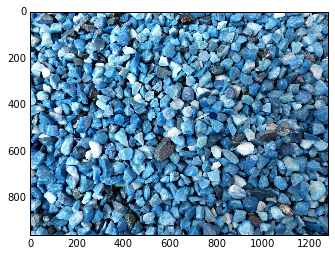

In [4]:
print(im0.shape)
plt.imshow(im0)

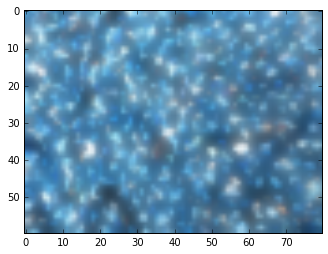

In [8]:

# Gaussian Pyramid
layer = im0.copy()
gaussian_pyramid = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)
# Laplacian Pyramid
layer = gaussian_pyramid[5]
laplacian_pyramid = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)
reconstructed_image = laplacian_pyramid[0]
for i in range(1, 2):
    size = (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0])
    reconstructed_image = cv2.pyrUp(reconstructed_image, dstsize=size)
    reconstructed_image = cv2.add(reconstructed_image, laplacian_pyramid[i])
    plt.imshow(reconstructed_image)


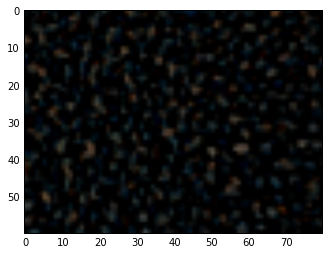

In [13]:
plt.imshow(laplacian_pyramid[1])

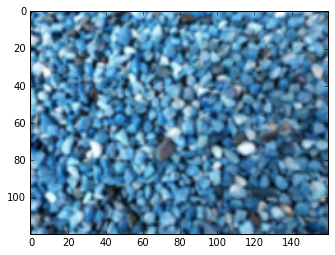

In [19]:
plt.imshow(gaussian_pyramid[3])